In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import japanize_matplotlib

In [2]:
keio_df = pd.read_csv('../../../野球部データ収集/keio_data/keio.csv', parse_dates=[1])
use_feature_df = keio_df[['UserID', 'TargetDate', 'Score', 'DiffRestHrValue', 'DiffWakedHrValue',
        'StressCount', 'DeepSleepRate', 'LowActivityHourws']]

answer_df = pd.read_csv('../../../野球部データ収集/keio_data/keio_answer_data.csv', parse_dates=[1])
category = pd.read_csv('../../../野球部データ収集/keio_data/category.csv', encoding='shift-jis')
answer_df = answer_df.merge(category)

def create_user_feature(user_id):
    output_df = use_feature_df[use_feature_df['UserID'] == user_id].reset_index(drop=True)
    output_df['TargetDate'] = output_df['TargetDate'].dt.date
    return output_df

def create_y(user_id):
    _piv_df = answer_df[answer_df['UserID'] == user_id].pivot_table(
        values='value',
        index='TargetDate',
        columns='category'
    ).reset_index()
    _piv_df['TargetDate'] = _piv_df['TargetDate'].dt.date
    _piv_df = _piv_df.drop(['体温', '朝食'], axis=1)
    _piv_df['mean'] = _piv_df.mean(axis=1)
    _piv_df['y'] = _piv_df['mean'].apply(lambda x: 1 if x >= _piv_df['mean'].mean()+_piv_df['mean'].std() else 0)
    for i in ['下肢の状態',	'肘の状態', '肩の状態']:
        _piv_df[f'y_{i}'] = _piv_df[i].apply(lambda x: int(x > 3))
    return _piv_df


## ノビスコアのユーザIDごとの相関を計算する

In [3]:
# users = keio_df['UserID'].unique()
users = [
    # 1504, 
    1505, 1755, 1781, 1774, 1773]

1505


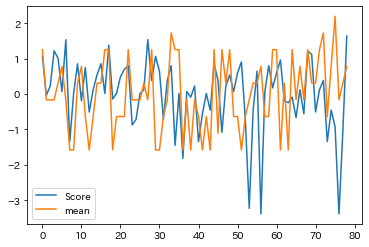

1755


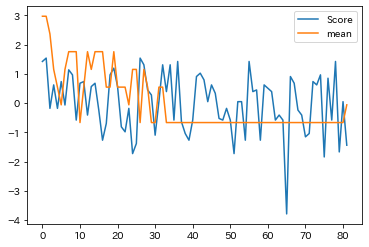

1781


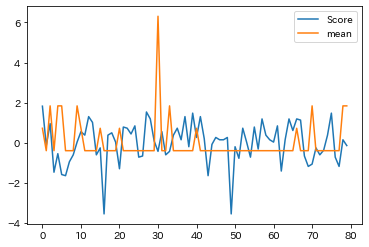

1774


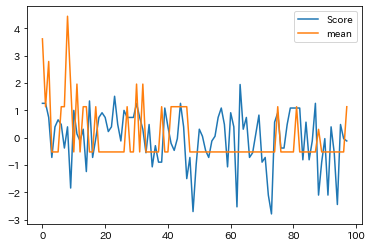

1773


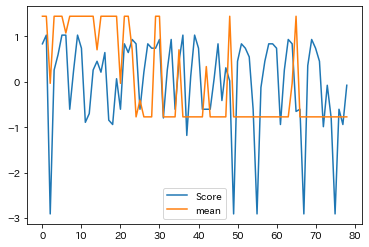

In [4]:
score_df = pd.DataFrame(index=users, columns=['mean', '下肢の状態', '肘の状態', '肩の状態'])
for user_id in users:
    print(user_id)
    X = create_user_feature(user_id)
    y = create_y(user_id)
    df = pd.merge(X, y, how='inner', on='TargetDate')
    scaler = StandardScaler()
    plt.plot(scaler.fit_transform(df[['Score', 'mean']].iloc[7:]))
    plt.legend(['Score', 'mean'])
    plt.show()
    score_df.loc[user_id] = df[['Score', 'mean', '下肢の状態', '肘の状態', '肩の状態']].iloc[7:].corr().iloc[0][1:]

In [5]:
score_df[['mean']]

,mean
1505,0.101726
1755,0.168134
1781,-0.075538
1774,0.102792
1773,0.17715


In [6]:
score_df[['mean']].mean()

mean    0.094853
dtype: float64